# 主成分分析算法的实现

In [1]:
import numpy as np
class Priceipal_Component_Analysis:
    def fit(self, data, dim):
        # data normalization
        mean_values = np.mean(data,axis=0)
        data_centered = data - mean_values
        # calculate cov
        data_cov = np.cov(data_centered,rowvar=0)
        # eigen-decomposition
        eig_values, eig_vects = np.linalg.eig(data_cov)
        # sort eig_values
        eig_values_sorted = np.argsort(-eig_values)
        #select biggest dim eigvalues
        top_dim_index = eig_values_sorted[:dim]
        # select top dim eig vectors
        top_dim_vects = eig_vects[:,top_dim_index]
        self.w = top_dim_vects
    def transform(self,data):
        # data normalization
        mean_values = np.mean(data,axis=0)
        data_centered = data - mean_values
        data_low = np.dot(data_centered,self.w)
        return data_low
    def fit_transform(self,data,dim):
        # data normalization
        mean_values = np.mean(data,axis=0)
        data_centered = data - mean_values
        # calculate cov
        data_cov = np.cov(data_centered,rowvar=0)
        # eigen-decomposition
        eig_values, eig_vects = np.linalg.eig(data_cov)
        # sort eig_values
        eig_values_sorted = np.argsort(-eig_values)
        #select biggest dim eigvalues
        top_dim_index = eig_values_sorted[:dim]
        # select top dim eig vectors
        top_dim_vects = eig_vects[:,top_dim_index]
        self.w = top_dim_vects
        data_low = np.dot(data_centered,self.w)
        return data_low


In [8]:
from sklearn.datasets import load_breast_cancer
cancer_data1 = load_breast_cancer()
data1 = cancer_data1['data']#feature space
mean_values = np.mean(data1, axis=0)
data_centered = data1 - mean_values
# calculate cov
data_cov = np.cov(data_centered, rowvar=0)

In [9]:
data1

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
data_cov

array([[ 1.24189201e+01,  4.90758156e+00,  8.54471417e+01,
         1.22448341e+03,  8.45445983e-03,  9.41970568e-02,
         1.90127582e-01,  1.12475116e-01,  1.42731729e-02,
        -7.75370629e-03,  6.63650325e-01, -1.89188600e-01,
         4.80354973e+00,  1.17968162e+02, -2.35533633e-03,
         1.30005142e-02,  2.06588280e-02,  8.17956306e-03,
        -3.03898170e-03, -3.97624858e-04,  1.65137495e+01,
         6.43310002e+00,  1.14288570e+02,  1.88822722e+03,
         9.62462515e-03,  2.29249204e-01,  3.87386440e-01,
         1.72392739e-01,  3.57457580e-02,  4.49735060e-04],
       [ 4.90758156e+00,  1.84989087e+01,  3.44397592e+01,
         4.85993787e+02, -1.41477877e-03,  5.37668058e-02,
         1.03692344e-01,  4.89769268e-02,  8.41887566e-03,
        -2.32115824e-03,  3.29037393e-01,  9.16695072e-01,
         2.44944877e+00,  5.08408652e+01,  8.54099045e-05,
         1.47865987e-02,  1.86039300e-02,  4.34837964e-03,
         3.24506954e-04,  6.19772637e-04,  7.32926700e+

In [12]:
eig_values, eig_vects = np.linalg.eig(data_cov)

In [13]:
eig_values

array([4.43782605e+05, 7.31010006e+03, 7.03833742e+02, 5.46487379e+01,
       3.98900178e+01, 3.00458768e+00, 1.81533030e+00, 3.71466740e-01,
       1.55513547e-01, 8.40612196e-02, 3.16089533e-02, 7.49736514e-03,
       3.16165652e-03, 2.16150395e-03, 1.32653879e-03, 6.40269304e-04,
       3.74883320e-04, 2.35169626e-04, 1.84583467e-04, 1.64180064e-04,
       7.81102011e-05, 5.76111660e-05, 3.49172775e-05, 2.83952689e-05,
       1.61463677e-05, 1.24902419e-05, 7.01997261e-07, 3.68048171e-06,
       2.84790425e-06, 2.00491564e-06])

In [14]:
eig_vects

array([[ 5.08623202e-03,  9.28705650e-03, -1.23425821e-02,
        -3.42380473e-02, -3.54561138e-02, -1.31213101e-01,
         3.35131912e-02,  7.54924585e-02, -3.50549264e-01,
        -1.39559852e-01, -4.19346972e-01, -7.35141931e-01,
         2.18087182e-01,  8.10260113e-02,  1.37865559e-01,
         1.41957144e-01,  4.42129324e-02,  8.97292328e-02,
        -2.10057742e-02, -8.01074429e-02, -5.94747776e-02,
         8.72363409e-03,  4.57847381e-03,  2.82894830e-02,
         3.59617411e-03,  1.60336173e-03,  6.48447162e-04,
         2.79341068e-03,  3.25869730e-03,  5.12865809e-04],
       [ 2.19657026e-03, -2.88160658e-03, -6.35497857e-03,
        -3.62415111e-01,  4.43187450e-01, -2.13486089e-01,
        -7.84253475e-01,  6.87405638e-02,  4.08376429e-03,
        -7.66679112e-02,  2.90168453e-02,  1.77040388e-03,
         4.23058843e-03,  1.98471260e-03, -7.07543943e-03,
         3.71772553e-03, -1.74411881e-03, -1.41458884e-04,
        -1.24960485e-03,  2.12853660e-04,  5.08486619e-

In [15]:
dim=2
# sort eig_values
eig_values_sorted = np.argsort(-eig_values)
#select biggest dim eigvalues
top_dim_index = eig_values_sorted[:dim]
# select top dim eig vectors
top_dim_vects = eig_vects[:, top_dim_index]
w = top_dim_vects
data_low = np.dot(data_centered, w)

In [17]:
top_dim_vects

array([[ 5.08623202e-03,  9.28705650e-03],
       [ 2.19657026e-03, -2.88160658e-03],
       [ 3.50763298e-02,  6.27480827e-02],
       [ 5.16826469e-01,  8.51823720e-01],
       [ 4.23694535e-06, -1.48194356e-05],
       [ 4.05260047e-05, -2.68862249e-06],
       [ 8.19399539e-05,  7.51419574e-05],
       [ 4.77807775e-05,  4.63501038e-05],
       [ 7.07804332e-06, -2.52430431e-05],
       [-2.62155251e-06, -1.61197148e-05],
       [ 3.13742507e-04, -5.38692831e-05],
       [-6.50984008e-05,  3.48370414e-04],
       [ 2.23634150e-03,  8.19640791e-04],
       [ 5.57271669e-02,  7.51112451e-03],
       [-8.05646029e-07,  1.49438131e-06],
       [ 5.51918197e-06,  1.27357957e-05],
       [ 8.87094462e-06,  2.86921009e-05],
       [ 3.27915009e-06,  9.36007477e-06],
       [-1.24101836e-06,  1.22647432e-05],
       [-8.54530832e-08,  2.89683790e-07],
       [ 7.15473257e-03, -5.68673345e-04],
       [ 3.06736622e-03, -1.32152605e-02],
       [ 4.94576447e-02, -1.85961117e-04],
       [ 8.

# 实践案例一 ：基于PCA的乳腺癌数据降维

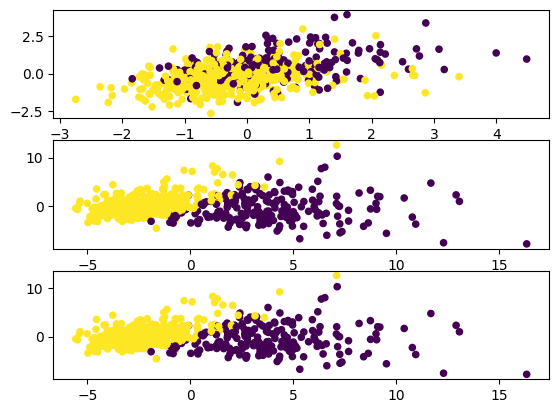

In [19]:
#读取数据
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
data = cancer_data['data']#feature space
y = cancer_data['target']#label space
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data) # data normalization
#数据可视化
# create figures
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
#show original data
x1 = np.argwhere(cancer_data['feature_names']=='mean symmetry')[0][0]
x2 = np.argwhere(cancer_data['feature_names']=='worst smoothness')[0][0]
x = data[:,[x1,x2]]
ax1.scatter(x[:,0],x[:,1],c=y,s=20,cmap=plt.cm.viridis)
#PCA降维
# do PCA tranformation
pca = Priceipal_Component_Analysis()
data_low = pca.fit_transform(data,dim=2)
# show low dimension PCA data
ax2.scatter(data_low[:,0],data_low[:,1],c=y,s=20,cmap=plt.cm.viridis)

# do PCA using sklearn
from sklearn.decomposition import PCA
pca_sklearn = PCA(n_components=2)
reduced_data = pca_sklearn.fit_transform(data)
ax3.scatter(reduced_data[:,0],reduced_data[:,1],c=y,s=20,cmap=plt.cm.viridis)


# MDS算法的实现

In [3]:
import numpy as np
class Multiple_Dimensional_Scaling:
    def euclidean_dist(self,x1,x2):
        dist = np.linalg.norm(x1-x2)
        return dist
    def get_dist_matrix(self,data):
        num = data.shape[0]
        dist_matrix = np.zeros((num,num),dtype=float)
        for i in range(num):
            for j in range(num):
                dist_matrix[i,j]=self.euclidean_dist(data[i], data[j])
        return dist_matrix
    def get_inner_prod_matrix(self,dist_matrix):
        D_square = np.square(dist_matrix)
        D_sum = np.sum(D_square,axis=1)/D_square.shape[0]
        D_i = np.repeat(D_sum[:,np.newaxis], dist_matrix.shape[0],axis=1)
        D_j = np.repeat(D_sum[np.newaxis,:], dist_matrix.shape[0],axis=0)
        D_ij = np.sum(D_square)/((dist_matrix.shape[0])**2)*np.ones([dist_matrix
                                                                     .shape[0],dist_matrix.shape[0]])
        inner_prod_matrix = (D_i + D_j - D_square - D_ij)/2
        return inner_prod_matrix
    def fit(self,data, low_dim =2):
        D = self.get_dist_matrix(data)
        B = self.get_inner_prod_matrix(D)
        eig_values, eig_vects = np.linalg.eigh(B)
        eig_values_sort = np.argsort(-eig_values)
        values_sort = eig_values[eig_values_sort]
        vects_sort = eig_vects[:,eig_values_sort]
        top_value_diag = np.diag(values_sort[0:low_dim])
        top_vects = vects_sort[:,0:low_dim]
        Z = np.dot(np.sqrt(top_value_diag),top_vects.T).T
        return Z



# 实践案例二：基于MDS算法的数据降维

/Users/pengyuyan/PSH/Machine_learning_basics/venv/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0.5, 1.0, ' after MDS in sklearn')

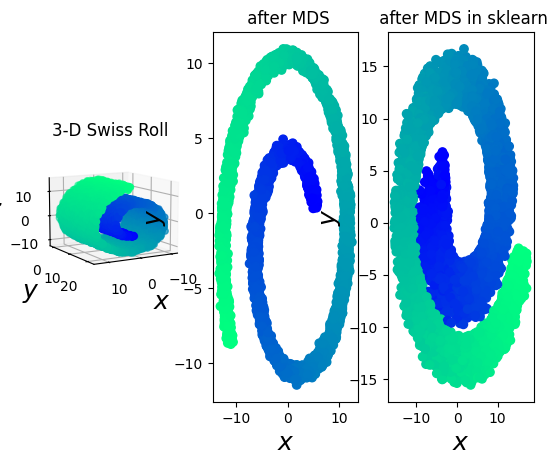

In [4]:
#读取数据
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3d
from sklearn.manifold import MDS
from sklearn.datasets import make_swiss_roll
X, y = make_swiss_roll(n_samples=5000,noise=0.2,random_state=42)
#降维
mds = Multiple_Dimensional_Scaling()
Z = mds.fit(X,low_dim=2)

mds_sklearn = MDS(n_components=2,metric=True)
X_mds = mds_sklearn.fit_transform(X)
#比较降维结果
axes =[-11.5,14,-2,23,-12,15]
fig = plt.figure()
ax1 = fig.add_subplot(131,projection="3d")
ax1.scatter(X[:,0],X[:,1],X[:,2],c=y,cmap=plt.cm.winter)
ax1.view_init(10,60)
ax1.set_xlabel("$x$",fontsize=18)
ax1.set_ylabel("$y$",fontsize=18)
ax1.set_zlabel("$z$",fontsize=18)
ax1.set_xlim(axes[0:2])
ax1.set_ylim(axes[2:4])
ax1.set_zlim(axes[4:6])
plt.title("3-D Swiss Roll")
ax2 = fig.add_subplot(132)
ax2.scatter(Z[:,0],Z[:,1],c=y,cmap=plt.cm.winter)
ax2.set_xlabel("$x$",fontsize=18)
ax2.set_ylabel("$y$",fontsize=18)
plt.title(" after MDS")
ax3 = fig.add_subplot(133)
ax3.scatter(X_mds[:,0],X_mds[:,1],c=y,cmap=plt.cm.winter)
ax3.set_xlabel("$x$",fontsize=18)
ax3.set_ylabel("$y$",fontsize=18)
plt.title(" after MDS in sklearn")

plt.cm.viridis：一种渐变的蓝绿黄色映射。
plt.cm.plasma：类似于 viridis，但颜色更偏向粉红。
plt.cm.inferno：一种渐变的黑红黄色映射。
plt.cm.magma：一种渐变的黑粉红黄色映射。
plt.cm.cividis：一种渐变的黄色到深蓝色的映射。
plt.cm.spring：粉红到黄色的映射。
plt.cm.summer：绿色到黄色的映射。
plt.cm.autumn：红色到橙色的映射。
plt.cm.winter：蓝色到绿色的映射。
plt.cm.cool：青色到粉红色的映射。
plt.cm.greys：不同灰度级别的映射。
plt.cm.purples：不同深浅的紫色。
plt.cm.blues：不同深浅的蓝色。
plt.cm.greens：不同深浅的绿色。
plt.cm.oranges：不同深浅的橙色。
plt.cm.reds：不同深浅的红色。
plt.cm.YlGn：从黄色到绿色的映射。
plt.cm.YlGnBu：从黄色到绿色再到蓝色的映射。
plt.cm.GnBu：从绿色到蓝色的映射。
plt.cm.BuGn：从蓝色到绿色的映射。
plt.cm.PuBu：从紫色到蓝色的映射。
plt.cm.BuPu：从蓝色到紫色的映射。
plt.cm.RdPu：从红色到紫色的映射。
plt.cm.PuRd：从紫色到红色的映射。
plt.cm.OrRd：从橙色到红色的映射。
plt.cm.YlOrRd：从黄色到橙色再到红色的映射。
plt.cm.YlOrBr：从黄色到橙色再到棕色的映射。
plt.cm.Purples：紫色系列。
plt.cm.Blues：蓝色系列。
plt.cm.seismic：从蓝色到红色的对比映射。